# Module 3

In [2]:
import pandas as pd
import numpy as np

##### Query 1

In [48]:
gold=pd.read_csv('gold.csv')

In [49]:
gold.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [50]:
gold.describe()

,Price,Open,High,Low,Pred,new
count,512.000000,512.000000,512.000000,512.000000,411.000000,512.000000
mean,30364.583984,30368.412109,30491.089844,30243.320312,341.712895,245.161859
std,1284.378623,1296.856656,1307.031684,1271.936410,271.075609,205.788897
min,27812.000000,27805.000000,27887.000000,27620.000000,-146.000000,11.109814
25%,29432.500000,29436.750000,29499.750000,29345.750000,156.500000,101.369172
50%,30427.500000,30399.500000,30545.000000,30286.000000,299.000000,184.537244
75%,31271.750000,31300.000000,31447.500000,31160.750000,475.000000,320.835031
max,33753.000000,34247.000000,34400.000000,33680.000000,2210.000000,1407.321485


In [51]:
gold_new=gold.dropna()
gold_new

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...,...
406,"Dec 04, 2018",30964,30874,31085,30874,0.08K,0.57%,-31.0,301.615081
407,"Dec 05, 2018",30926,30830,30970,30825,0.04K,-0.12%,72.0,241.475101
408,"Dec 06, 2018",31005,31039,31196,30974,10.55K,0.26%,35.0,188.222186
409,"Dec 07, 2018",31440,31011,31480,30941,11.24K,1.40%,669.0,976.692705


In [52]:
gold.shape

(512, 9)

In [53]:
gold.isnull().sum()

Date          0
Price         0
Open          0
High          0
Low           0
Vol.          0
Change %      0
Pred        101
new           0
dtype: int64

In [54]:
#now we know that th colomn which is partially filled is pred

In [55]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score,mean_squared_error

In [56]:
#initaialising array to predict
y=np.array(gold_new['Pred']).reshape(-1,1)
x=np.array(gold_new['new']).reshape(-1,1)

In [57]:
#model preparation
regression=LinearRegression()

In [58]:
#fitting model and then getting predicted values
regression.fit(x,y)
y_pred=regression.predict(x)

In [59]:
#checking how nice the model has fitted using metrics like root mean square and r2 score
print("RMSE: ",mean_squared_error(y,y_pred))
print("R2 Score: ",r2_score(y,y_pred))

RMSE:  73300.46132887459
R2 Score:  3.732507600850976e-05


In [60]:
#now that our model is fitted we will predict the null values in orignal data
original_data=gold[:]
original_data_new=original_data['new'].values.reshape(-1,1)

In [61]:
#now data with null values from columns new and pred is taken and predcited then set into the main data file.
na_data=regression.predict(original_data_new)
na_data_series = pd.Series(na_data.ravel())
sata = na_data_series.to_frame()
gold['Pred'] = sata
gold

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,342.702580,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,341.238649,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,342.582797,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,342.836517,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,342.747169,112.153318
...,...,...,...,...,...,...,...,...,...
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,341.635810,247.177322
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,343.240625,52.201158
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,342.737786,113.293305
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14%,343.272194,48.365693


In [62]:
#let's check if there are any null values left
gold['Pred'].isnull().sum()

0

In [63]:
gold.isnull().sum() # we now have no null values in any column

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
Pred        0
new         0
dtype: int64

RMSE:  1.2291678799353053e-23
R2 Score:  1.0


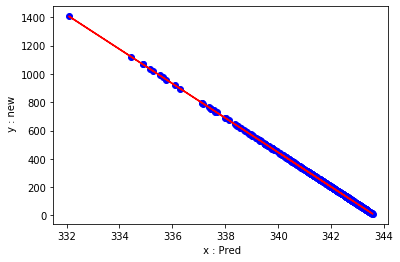

Slope: [[-121.49444741]]
Intercept: [41754.03127127]


In [64]:
#now fitting new colomn to see how accurate are the predictions

import matplotlib.pyplot as plt

x=np.array(gold['Pred']).reshape(-1,1)
y=np.array(gold['new']).reshape(-1,1)

model=LinearRegression()

model.fit(x,y)

pred_y=model.predict(x)

print("RMSE: ",mean_squared_error(y,pred_y))
print("R2 Score: ",r2_score(y,pred_y))

#we are plotting scatter plot to see accuracy
plt.scatter(x,y,color='b')
plt.xlabel(' x : Pred')
plt.ylabel(' y : new')
#predicted values
plt.plot(x,pred_y,color='r')
plt.show()

print('Slope:' ,model.coef_)
print('Intercept:', model.intercept_)

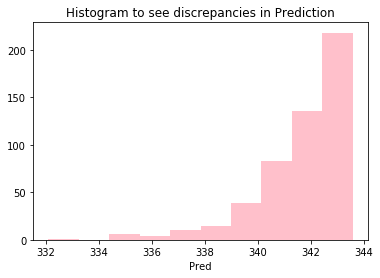

In [65]:
#plots to look for discrepancies in prediction
plt.hist(gold['Pred'],color='pink')
plt.xlabel('Pred')
plt.title('Histogram to see discrepancies in Prediction')
plt.show()

Text(0.5, 1.0, 'Distplot to look for discrepancies in Prediction')

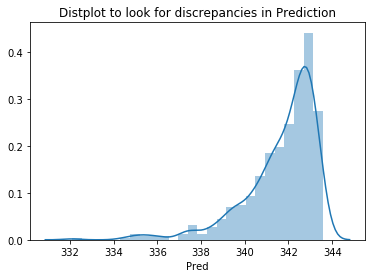

In [66]:
import seaborn as sns
sns.distplot(gold['Pred'])
plt.title('Distplot to look for discrepancies in Prediction')

##### Query 2

In [22]:
import statsmodels.api as sm

In [35]:
#importing nifty dataset
nifty=pd.read_csv('Nifty50.csv')
nifty.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
3,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77


In [4]:
nifty.isnull().sum()

Date                 0
Open                 0
High                 0
Low                  0
Close                0
Shares Traded        0
Turnover (Rs. Cr)    0
dtype: int64

In [5]:
nifty.describe()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
count,494.000000,494.000000,494.000000,494.000000,4.940000e+02,494.000000
mean,10583.743016,10622.674291,10525.919939,10574.617308,2.648677e+08,13677.918806
std,570.074238,571.067477,563.662359,567.090953,9.739529e+07,4345.230980
min,9384.050000,9431.900000,9341.650000,9360.550000,3.108638e+07,1534.080000
25%,10177.975000,10225.237500,10125.050000,10166.887500,1.975549e+08,10493.917500
50%,10594.500000,10632.400000,10533.625000,10584.725000,2.421258e+08,12943.310000
75%,10897.762500,10937.700000,10840.762500,10892.812500,3.106006e+08,16118.212500
max,11856.150000,11856.150000,11738.500000,11787.150000,7.411532e+08,35131.190000


In [36]:
#importing apple dataset
apple=pd.read_csv('AAPL.csv')
apple.head()

,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity
0,"Oct 24, 2019",243.58,244.66,244.75,241.81,17.92M
1,"Oct 23, 2019",243.18,242.10,243.24,241.22,19.93M
2,"Oct 22, 2019",239.96,241.16,242.20,239.62,22.68M
3,"Oct 21, 2019",240.51,237.52,240.99,237.32,22.37M
4,"Oct 18, 2019",236.41,234.59,237.58,234.29,24.38M


In [8]:
apple.isnull().sum()

Date                     0
Close Price              0
Open Price               0
High Price               0
Low Price                0
Total Traded Quantity    0
dtype: int64

In [9]:
apple.describe()

,Close Price,Open Price,High Price,Low Price
count,503.000000,503.000000,503.000000,503.000000
mean,189.891670,189.787217,191.627137,188.084076
std,21.231769,21.198211,21.340226,21.131357
min,142.190000,143.980000,145.720000,142.000000
25%,172.980000,173.020000,174.525000,171.715000
50%,187.900000,187.720000,189.220000,186.020000
75%,207.065000,205.925000,208.095000,203.950000
max,243.580000,244.660000,244.750000,241.810000


In [19]:
daily_apple=apple['Close Price'].pct_change()
daily_nifty=nifty['Close'].pct_change()

In [20]:
daily_apple=daily_apple.dropna()
daily_nifty=daily_nifty.dropna()

daily_apple=daily_apple[:493]

In [47]:
x=daily_apple
y=daily_nifty

ols= sm.OLS(y,x).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Close   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.001
Method:                 Least Squares   F-statistic:                              1.308
Date:                Mon, 06 Jul 2020   Prob (F-statistic):                       0.253
Time:                        15:09:51   Log-Likelihood:                          1732.9
No. Observations:                 493   AIC:                                     -3464.
Df Residuals:                     492   BIC:                                     -3460.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Close Price     0.0212      0.018      1.144      0.253      -0.015       0.057
==============================================================================
Omnibus:                       10.560   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               12.732
Skew:                          -0.242   Prob(JB):                      0.00172
Kurtosis:                       3.621   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
apple_data=pd.read_csv('AAPL.csv')
nifty_data=pd.read_csv('Nifty50.csv')

monthly_prices = pd.concat([apple_data['Close Price'], nifty_data['Close']], axis=1)
monthly_prices.columns = ['Apple', 'Nifty']
monthly_prices

,Apple,Nifty
0,243.58,9445.40
1,243.18,9512.25
2,239.96,9525.75
3,240.51,9429.45
4,236.41,9427.90
...,...,...
498,169.04,NaN
499,166.72,NaN
500,163.05,NaN
501,157.41,NaN


In [44]:
monthly_returns=(monthly_prices.pct_change(1)).dropna(axis=0)
monthly_returns

,Apple,Nifty
1,-0.001642,0.007078
2,-0.013241,0.001419
3,0.002292,-0.010109
4,-0.017047,-0.000164
5,-0.004780,0.001098
...,...,...
498,0.012883,0.000000
499,-0.013725,0.000000
500,-0.022013,0.000000
501,-0.034591,0.000000


In [46]:
x=monthly_returns['Apple']
y=monthly_returns['Nifty']

x1=sm.add_constant(x)

model=sm.OLS(y,x1)

summary=model.fit()
print(summary.summary())

                            OLS Regression Results                            
Dep. Variable:                  Nifty   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.419
Date:                Mon, 06 Jul 2020   Prob (F-statistic):              0.234
Time:                        15:08:11   Log-Likelihood:                 1769.7
No. Observations:                 502   AIC:                            -3535.
Df Residuals:                     500   BIC:                            -3527.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.165      0.2

##### Thank You